In [1]:
import numpy as np
import sklearn
import kmapper as km
import pygeodesic
import pygeodesic.geodesic as geodesic
from scipy.spatial import distance_matrix
import vtk
from mpl_toolkits.mplot3d import Axes3D  # noqa
import scipy as sp
import networkx as nx
import random
import math
from networkx.algorithms import approximation
from scipy.spatial.distance import cdist
import open3d as o3d
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sgw

In [2]:
def read_off_file(filename):
    with open(filename) as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
        
        if lines[0] != "OFF":
            raise ValueError('Not a valid OFF file')
        n_vertices, n_faces, _ = map(int, lines[1].split())
        vertices = [tuple(map(float, line.split())) for line in lines[2:2 + n_vertices]]
        faces = [tuple(map(int, line.split()[1:])) for line in lines[2 + n_vertices: 2 + n_vertices + n_faces]]

        # Create an array of vertex indices
        vertex_indices = np.arange(n_vertices)
        
    return np.array(vertices), np.array(faces), vertex_indices


In [3]:
def mapper_subsample(vertices, D, n_add = 10):

    data = vertices
    mapper = km.KeplerMapper(verbose=0)
    
    lens = mapper.fit_transform(data)
    
    graph = mapper.map(
        lens,
        data,
        clusterer=sklearn.cluster.DBSCAN(eps=0.2, min_samples=3),
        cover=km.Cover(n_cubes=60, perc_overlap=0.01),
    )

    nodes = list(graph['nodes'].keys())
    
    indexes = []
    for i in range(len(nodes)):
        tmp_idx = np.array(graph['nodes'][nodes[i]], int)
        tmp_d = D[tmp_idx,:][:, tmp_idx].sum(axis=1)
        indexes.append(tmp_idx[np.argmin(tmp_d)])

    for i in range(n_add):
        tmp_D = np.min(D[:,indexes], axis=1)
        indexes.append(np.argmax(tmp_D))

    print("%d points selected by Mapper with %d addition points" %(len(nodes), n_add))

    return indexes

In [4]:
#1

In [5]:
vertices_1, faces_1, vertex_indices_1 = read_off_file('octopus1.off')

geoalg = geodesic.PyGeodesicAlgorithmExact(vertices_1, faces_1)
D_1 = np.zeros((len(vertex_indices_1), len(vertex_indices_1)))
for i in range(D_1.shape[0]):
    source_indices = np.array([vertex_indices_1[i]]) 
    target_indices = np.array(vertex_indices_1)
    distancess, best_source = geoalg.geodesicDistances(source_indices, target_indices)
    D_1[i] = distancess 
    
idx_1 = mapper_subsample(vertices_1, D_1, n_add=10) 
idx_array1 = np.array(idx_1)
idx_array1

134 points selected by Mapper with 10 addition points


/Users/salovjade/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


array([ 307,  556,  575,   53,  148,  414,   57,  956,   55,  339,  628,
        971,  574,  909,    1,  602,  463, 1001,    0,   69,  358,  992,
        218,   96,  906,  999,  582,  623,  914,  687,  621,  800,  354,
        994,  831,  836,  616,  993,  352,  686,  834,  349,   81,  742,
        997,  752,  608,   83,  547,  784,  987,  667,  362,  392,  249,
        809,  984,  400,  629,  265,  102,  883,  716,  258,  355,  678,
        160,  100,  581,  782,  931,  254,  459,  775,  882,  618,  756,
        939,  159,  351,  700,  761,    7,  693,  759,  748,  416,  731,
        268,  270,  136,  708,  818,  174,   17,  523,  263,  721,  703,
        106,  634,  288,  114,  255,  165,  509,  198,   38,  367,  712,
        276,   28,  105,  550,  475,  266,  727,  157,  172,  298,  156,
        273,  668,  389,  421,  378,  747,  181,  204,  112,  554,  501,
         33,  173,  935,  898,  948,   64,  597,  968,  947,  944,  328,
        539])

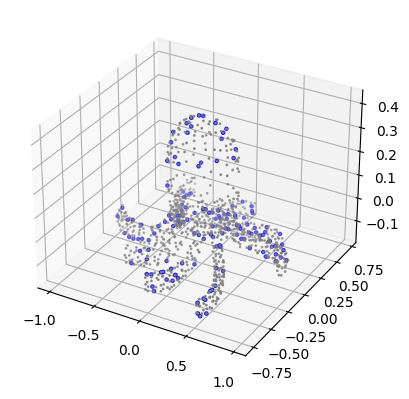

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices_1[:,0], vertices_1[:,1], -vertices_1[:,2], color='grey', s=1)
ax.scatter(vertices_1[idx_1,0], vertices_1[idx_1,1], -vertices_1[idx_1,2], color='b', s=5)

In [7]:
#2

In [8]:
vertices_2, faces_2, vertex_indices_2 = read_off_file('octopus2.off')
geoalg = geodesic.PyGeodesicAlgorithmExact(vertices_2, faces_2)
D_2 = np.zeros((len(vertex_indices_2), len(vertex_indices_2)))
for i in range(D_2.shape[0]):
    source_indices = np.array([vertex_indices_2[i]]) 
    target_indices = np.array(vertex_indices_2)
    distancess, best_source = geoalg.geodesicDistances(source_indices, target_indices)
    D_1[i] = distancess
    
idx_2 = mapper_subsample(vertices_2, D_2, n_add=10)  
idx_array2 = np.array(idx_2)
idx_array2

117 points selected by Mapper with 10 addition points


array([925, 841, 843, 817, 818, 776, 773, 753, 684, 682, 983, 614, 957,
       579, 448, 934, 208, 510, 874, 169, 421, 587, 889, 106, 419, 835,
       105, 852, 882, 105, 794, 125, 770, 881, 124, 418, 699, 168, 480,
       416, 976, 424, 356, 314, 381, 955, 230, 404, 182, 790, 812, 166,
       379, 164, 162, 458, 853, 177, 437, 250, 375, 655, 830, 244, 238,
       242, 805, 868, 192, 378, 865, 189, 220, 821, 133, 240, 849, 115,
       139, 333, 810, 119, 272,  56,  99, 436,  63,  78, 200, 468,  55,
        71, 273, 493,  61, 159, 465,  60, 143, 492,  59, 123, 528,  25,
        39,   8,  30,   1,   0,  20,   6,  21,  16,  12,  11,   2,   4,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

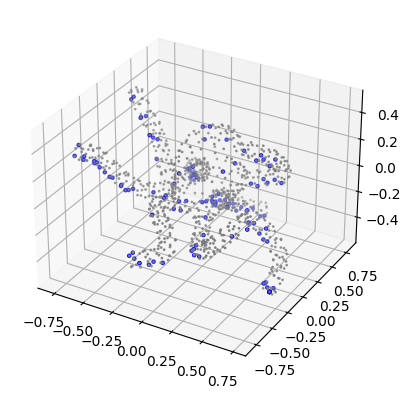

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vertices_2[:,0], vertices_2[:,1], -vertices_2[:,2], color='grey', s=1)
ax.scatter(vertices_2[idx_2,0], vertices_2[idx_2,1], -vertices_2[idx_2,2], color='b', s=5)

In [10]:
geoalg = geodesic.PyGeodesicAlgorithmExact(vertices_1, faces_1)

# Geodesic distance matrix
C1 = np.zeros((len(idx_1), len(idx_1)))
for i in range(C1.shape[0]):
    source_indices = np.array([idx_1[i]]) 
    target_indices = np.array(idx_1)
    distancess, best_source = geoalg.geodesicDistances(source_indices, target_indices)
    C1[i] = distancess
    
np.savetxt('geodesic_C1_1203.csv', C1, delimiter=',', fmt='%.10f')  

In [11]:
geoalg = geodesic.PyGeodesicAlgorithmExact(vertices_2, faces_2)

C2 = np.zeros((len(idx_2), len(idx_2)))
for i in range(C2.shape[0]):
    source_indices = np.array([idx_2[i]]) 
    target_indices = np.array(idx_2)
    distancess, best_source = geoalg.geodesicDistances(source_indices, target_indices)
    C2[i] = distancess
    
np.savetxt('geodesic_C2_1203.csv', C2, delimiter=',', fmt='%.10f') 

In [12]:
file_path = 'geodesic_C1_1203.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Convert the DataFrame to a NumPy array
matrix = df.values

# Calculate the sum of the matrix
matrix_max = np.max(matrix)
matrix_max

2.025802633

In [13]:
file_path = 'geodesic_C2_1203.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Convert the DataFrame to a NumPy array
matrix = df.values

# Calculate the sum of the matrix
matrix_max = np.max(matrix)
matrix_max

2.041906225

In [15]:
geo1 = np.loadtxt('geodesic_C1_1203.csv', delimiter=',')
#geodesic_C2_1122 is for more downsampled data to see the head
geo2 = np.loadtxt('geodesic_C2_1203.csv', delimiter=',')

n = geo1.shape[0]
m = geo2.shape[0]
P = np.zeros((n, m))

# Define the vector of threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]


# Loop over the threshold values
for threshold in thresholds:
    # Compute the Gromov-Wasserstein distance
    P = sgw.supervised_gromov_wasserstein(geo1, geo2, nitermax=20, threshold=threshold)

    # Save the result to a CSV file
    filename = f'P_octopus_1203_{threshold}.csv'
    np.savetxt(filename, P, delimiter=',', fmt='%.10f')
    